In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re

plt.style.use('dark_background')

In [2]:

df2 = pd.read_csv("../data/kindle_reviews.csv.zip",compression='zip', sep=',', index_col=0)
#df2 = df1.sample(100000)
df2.reviewTime = pd.to_datetime(df2.reviewTime)
df2['reviewYear'] = df2.reviewTime.dt.year
not_helpful = pd.Series(df2.helpful.apply(lambda x:re.findall(r'\d+',x)[0]))
helpful = pd.Series(df2.helpful.apply(lambda x:re.findall(r'\d+',x)[1]))
df2['not_helpful_count'] = not_helpful.astype(int)
df2['helpful_count'] = helpful.astype(int)


In [3]:
df2.groupby('asin').agg(
    count_reviews_per_product = ('reviewerID', 'nunique')
).sort_values(by='count_reviews_per_product',ascending=False)

#tmp = df2[df2['asin'] =='B006GWO5WK']
#print(tmp.shape)
#tmp

,count_reviews_per_product
asin,
B006GWO5WK,1113
B00BTIDW4S,781
B00BT0J8ZS,516
B00JDYC5OI,502
B00H0V069M,481
...,...
B008OP2ILM,5
B00HSP1NYC,5
B008OKFFP8,5


(array([6.767e+04, 4.300e+02, 8.300e+01, 2.500e+01, 7.000e+00, 2.000e+00,
        3.000e+00, 1.000e+00, 1.000e+00, 1.000e+00]),
 array([   5. ,  121.8,  238.6,  355.4,  472.2,  589. ,  705.8,  822.6,
         939.4, 1056.2, 1173. ]),
 <BarContainer object of 10 artists>)

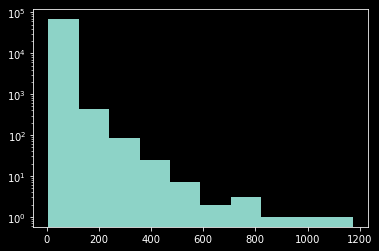

In [4]:
tmp = df2.groupby('reviewerID').agg(
        count_reviews_per_reviewer = ('asin', 'nunique')
).sort_values(by='count_reviews_per_reviewer',ascending=False)
plt.hist(tmp, log=True)

Text(0.5, 1.0, 'helpful/not helpful per year')

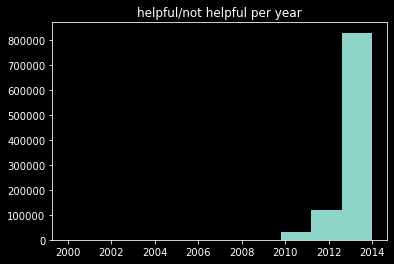

In [5]:
df2['helpful_diff_abs'] = abs(df2['not_helpful_count'] - df2['helpful_count'])
df2['helpful_not_diff'] = df2['not_helpful_count'] - df2['helpful_count']
df2.sort_values('helpful_not_diff', ascending=True, inplace=True)

plt.hist(df2.reviewYear, bins=10)
plt.title('helpful/not helpful per year')

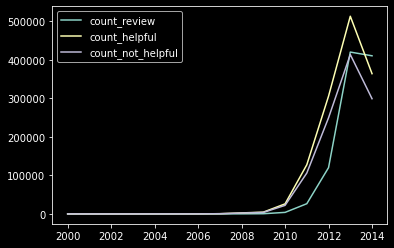

In [6]:
gr_review_year = df2.groupby('reviewYear').agg(
                    count_review=('overall', 'count'),
                    count_helpful=('helpful_count', 'sum'),
                    count_not_helpful=('not_helpful_count', 'sum'))
plt.plot(gr_review_year[['count_review','count_helpful', 'count_not_helpful']])
plt.legend(['count_review', 'count_helpful','count_not_helpful'])
#plt.hist(gr_review_year['count_helpful'], bins=20, alpha=0.3, log=True)
#plt.hist(gr_review_year['count_not_helpful'], bins=20, alpha=0.3, log=True)

Text(0.5, 1.0, 'reviews per product')

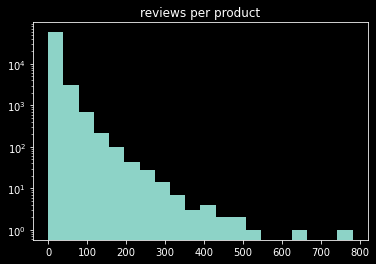

In [7]:
gr_ratings_per_product = df2.groupby('asin').agg(
    count_ratings=('reviewerName', 'count')
)
plt.hist(gr_ratings_per_product, bins=20, log=True)
plt.title('reviews per product')

                  count_asin_per_diff
helpful_not_diff                     
-193                                1
-187                                1
-124                                1
-96                                 1
-93                                 1


(array([25., 15.,  4.,  0.,  1.,  0.,  2.,  1.,  2.,  3.,  1.,  0.,  0.,
         1.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.,
         22.,  24.,  26.,  28.,  30.,  32.,  34.,  36.,  38.,  40.,  42.,
         44.,  46.,  48.,  50.,  52.,  54.,  56.,  58.,  60.,  62.,  64.,
         66.,  68.,  70.,  72.,  74.,  76.,  78.,  80.,  82.,  84.,  86.,
         88.,  90.,  92.,  94.,  96.,  98., 100., 102., 104., 106., 108.,
        110., 112., 114., 116., 118., 120., 122., 124., 126., 12

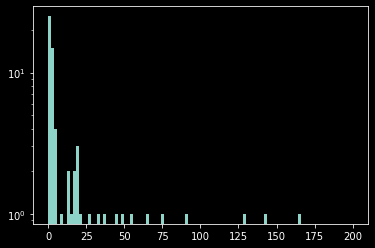

In [8]:
tmp = df2.groupby('helpful_not_diff').agg(
        count_asin_per_diff = ('asin', 'count')
)
print(tmp.head())
plt.hist(tmp, range=(0,200), bins=100, log=True)
#gr_rating_per_review = df2.groupby('')